                        time        P_l
0  2016-06-10 16:50:00+00:00  26441.630
1  2016-06-10 16:55:00+00:00  26039.196
2  2016-06-10 17:00:00+00:00  21790.632
3  2016-06-10 17:05:00+00:00  22824.290
4  2016-06-10 17:10:00+00:00  23408.187


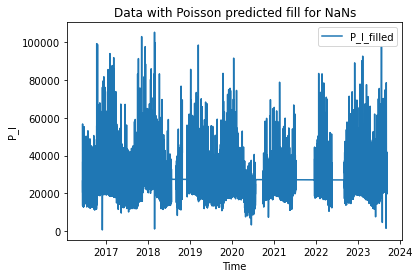

In [2]:
# Заполнение пропущенных значений с Пуассоновским распределением

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Загрузка ваших данных
df = pd.read_csv('result/filled_P_l.csv')

# Проверьте, правильно ли загружены данные и есть ли у вас временной столбец
print(df.head())

# Если у вас есть столбец с датой/временем, убедитесь, что pandas распознает его как таковой
# Например, если ваш столбец с датой/временем называется 'timestamp', выполните:
df['time'] = pd.to_datetime(df['time'])

# И установите его в качестве индекса
df.set_index('time', inplace=True)

# Если в вашем столбце времени используется другое имя, замените 'timestamp' на соответствующее имя

# Выберите целевую переменную, которую вы хотите заполнить. Например, 'P_l'
data = df['P_l']

# Создание переменной времени
time = np.arange(len(data))

# Использование только непропущенных значений для обучения модели
train_data = data.dropna()
train_time = time[data.notna()]

# Обучение GLM модели с Пуассоновским распределением
model = sm.GLM(train_data, sm.add_constant(train_time), family=sm.families.Poisson()).fit()

# Предсказание пропущенных значений
predict_time = time[data.isna()]
predicted_data = model.predict(sm.add_constant(predict_time))

# Заполнение пропущенных значений предсказанными
data[data.isna()] = predicted_data

# Замените заполненные данные в исходном датафрейме
df['P_l_filled'] = data

# Визуализация данных
plt.plot(df.index, df['P_l_filled'], label='P_l_filled')
plt.title('Data with Poisson predicted fill for NaNs')
plt.xlabel('Time')
plt.ylabel('P_l')
plt.legend()
plt.show()
